# Analiza podstrani(subredditov) r/news in r/worldnews spletne strani Reddit

Reddit je ameriška zabavna, družbena in novičarska spletna stran.
Na Reddit uporabniki objavljajo razne povezave (večinoma na druge spletne strani), ki jih lahko drugi uporabniki ocenijo pozitivno (upvote) ali negativno (downvote) in komentirajo. Razdeljena je na več podstrani-subredditov.

Podstrani r/news in r/worldnews sta privzeti. Objave privzetih strani se pokažejo neregistriranim in novim uporabnikom na naslovnici(front page), ker se večina uporabnikov od podstrani ne odjavi, le prijavi, imajo tako privzete strani avtomatsko največ uporabnikov.

Primerjala sem novice dveh takih večjih podstrani r/news-novice in r/worldnews-svetovne novice. Podstrani so razdeljene na več delov, analizirala sem top-najboljše in contraversial-kontraverzno.

##Hipoteze
    -1. r/news bo imel več ameriških virov novic kot r/worldnews.
    -2. Viri r/worldnews bodo kvalitetnejše od virov r/news. (The Guardian > FoxNews ) 
    -3. Novice iz predela kontraverzno bodo iz tabloidov, rumenega tiska ali z zavajujočo vsebino.
##Primerjave
    -Primerjala bom iste novice iz obeh podstrani na podlagi komentarjev in točk.
    -Primerjala bom, katere so najbolj komentirane in  najbolj pozitivno ocenjene novice.

In [2]:
import pandas as pd

In [52]:
news_con=pd.read_csv('news_con.csv')
news_top=pd.read_csv('news_top.csv')
wnews_con=pd.read_csv('wnews_con.csv')
wnews_top=pd.read_csv('wnews_top.csv')

In [74]:
news_con_viri=news_con.groupby(['Vir'],as_index=False)
news_top_viri=news_top.groupby(['Vir'],as_index=False)
wnews_con_viri=wnews_con.groupby(['Vir'],as_index=False)
wnews_top_viri=wnews_top.groupby(['Vir'],as_index=False)

###Hipoteza 1: r/news bo imel več ameriških virov novic kot r/worldnews
Že v samem opisu podstrani r/worldnews je zapisano, da stran dovoljuje povezave na vse novice, razen notranjih zadev in politike ZDA. Tako še s preštetjem pojavitve virov potrdimo, da hipoteza drži.

In [106]:
news_con_viri['Vir'].size().sort_values(ascending=False).head(n=10)

Vir
washingtonpost.com    38
theguardian.com       32
nbcnews.com           16
nytimes.com           15
arstechnica.com       13
reuters.com           11
cnn.com               10
news.yahoo.com        10
bigstory.ap.org        9
latimes.com            8
dtype: int64

In [103]:
news_top_viri['Vir'].size().sort_values(ascending=False).head(n=10)

Vir
washingtonpost.com    38
theguardian.com       32
nbcnews.com           16
nytimes.com           15
arstechnica.com       13
reuters.com           11
cnn.com               10
news.yahoo.com        10
bigstory.ap.org        9
latimes.com            8
dtype: int64

In [104]:
wnews_top_viri['Vir'].size().sort_values(ascending=False).head(n=10)

Vir
theguardian.com       52
bbc.com               28
independent.co.uk     26
bbc.co.uk             23
reuters.com           16
nytimes.com           15
washingtonpost.com    14
rt.com                10
cbc.ca                 9
news.yahoo.com         8
dtype: int64

In [105]:
wnews_con_viri['Vir'].size().sort_values(ascending=False).head(n=10)

Vir
rt.com                    44
dailymail.co.uk           23
self.worldnews            15
timesofisrael.com         13
bbc.co.uk                 13
theguardian.com           12
telegraph.co.uk           10
news.bbc.co.uk            10
israelnationalnews.com    10
nytimes.com                9
dtype: int64

Komentar: 
(Analiziram samo 10 najpogostejših virov)
V razdelku najboljše r/news se pojavi samo 1 neameriški vir (theguardian.com). V razdelku kontraverzno r/news jih je več (3: theguardian.com, independent.co.uk,dailymail.co.uk), vendar sta ameriška vira na prvih dveh mestih po pogostosti.
Opaznejša je razlika v r/worldnews. V obeh razdelkih skupaj sta se samo 2 ameriška vira(nytimes.com, washingtonpost.com) uvrstila med 10 najpogostejših.

Predvidevem lahko, da so bralci in naročniki r/news večinoma prebivalci ZDA, ki jih seveda zanimajo novice povezane z ZDA, bralci r/worldnews pa so ostali obiskovalci Reddita.

###Viri r/worldnews bodo kvalitetnejše od virov r/news.


Že na začetku opazimo ameriško novičarsko stran foxnews.com na prvem mestu v kategoriji r/news kontraverzno. To ni nič presenetljivega, saj je bil kanal že večkrat obtožen prikrivanja in napihovanja informacij in pristranskega poročanja. To velikokrat vodi do 'clickbait' novic, ki zelo hitro pritegnejo bralca. Tukaj je izpisanih 5 najbolj komentiranih novic vira foxnews.com.
Ugotovimo, da so kar 'kontraverzni'.

In [107]:
news_con[news_con['Vir'] =='foxnews.com'].sort_values('Score', ascending=False).head(n=5)

#news_con[news_con['Vir'] =='foxnews.com'].sort_values('Komentarji', ascending=False).head(n=5)

,Naslov,Score,Komentarji,Vir
362,Missouri cop was badly beaten before shooting ...,313,992,foxnews.com
558,Study: Murder rate drops as concealed carry pe...,41,63,foxnews.com
178,Tom Cruise: My work as an actor is as hard as ...,18,34,foxnews.com
535,"2 NYPD cops shot in car, both critically injured",15,58,foxnews.com
534,Republicans envy the Holocaust industry and ha...,8,13,foxnews.com


Drugi najbolj pogosti vir je washingtonpost.com. Ta vir je eden izmed vodilnih ameriških medijev predvsem se je uveljavils poročanjem iz bele hiše. Ugotovimo, da je najbolj komentirana novica o legalizaciji istospolnih porok. 

In [108]:
news_con[news_con['Vir'] =='washingtonpost.com'].sort_values('Komentarji', ascending=False).head(n=5)

,Naslov,Score,Komentarji,Vir
338,Supreme Court legalizes gay marriage,5170,17086,washingtonpost.com
211,Police get called on suicidal teenager cutting...,597,1574,washingtonpost.com
20,"Pope Francis tells family that drove 13,000 mi...",2075,857,washingtonpost.com
95,Reddit bans subreddit for finding the Navy Yar...,1134,716,washingtonpost.com
148,There have been 334 days and 351 mass shooting...,11,117,washingtonpost.com


V kategoriji r/news najboljše in r/worldnews so vsi viri iz zanesljivih uglednih virov. 
Razlika se ponovno pojavi v kategoriji r/worldnews kontraverzno. Tukaj prevladujeta ruski portal rt.com in dailymail.co.uk. Prvi je svetu poznana kot je svetu poznan kot propagandni medij ruske vlade, drugi je britanski tabloid z tračarsko vsebino.

In [109]:
wnews_con[wnews_con['Vir'] =='rt.com'].sort_values('Komentarji', ascending=False).head(n=5)

,Naslov,Score,Komentarji,Vir
85,The US has been voted as the most significant ...,2233,5979,rt.com
235,UK: Man jailed for 33 months for pirating ‘Fas...,2396,3245,rt.com
135,"Russell Brand: ‘Fanatical, terrorist, propagan...",1004,987,rt.com
123,New video: Edward Snowden receives award from ...,1593,575,rt.com
222,400 US mercenaries 'deployed on ground' in Ukr...,312,557,rt.com


In [110]:
wnews_con[wnews_con['Vir'] =='dailymail.co.uk'].sort_values('Komentarji', ascending=False).head(n=5)

,Naslov,Score,Komentarji,Vir
192,Mobs of 'hundreds' of masked men rampage throu...,3339,6268,dailymail.co.uk
61,Roman Catholic church's paedophile investigato...,772,784,dailymail.co.uk
57,'No porn or prostitution': Islamic extremists ...,16,204,dailymail.co.uk
178,Secret £14million Bible in which 'Jesus predic...,83,151,dailymail.co.uk
307,'Someone's coming to get me': Terrified phone-...,359,149,dailymail.co.uk


Komentar:
Moja hipoteza je ovržena. Izkazalo se je, da se razlika pojavi v kategoriji kontraverzo. 

###Hipoteza3: Novice iz predela kontraverzno bodo iz tabloidov, rumenega tiska ali z zavajujočo vsebino.

To smo ravnokar ugotovili.

In [38]:
news_con_viri.mean().sort_values(by='Score',ascending=False).head(n=10)
news_con_viri.mean().sort_values(by='Komentarji',ascending=False).head(n=10)

,Score,Komentarji
Vir,,
thelocal.dk,4138,10511
fox26houston.com,4313,5955
kansasfirstnews.com,2604,5371
nbcbayarea.com,3307,4782
clickorlando.com,1258,4416
news-medical.net,2252,4336
nj.com,3306,4227
nbcmiami.com,735,3669
tv.yahoo.com,991,3369


###Primerjava povprečnih komenarjev in točk virov vseh 4 datotek


In [118]:
#povprečje komentarjev in ocen za vsak vir
news_con_viri2=news_con_viri.mean()
news_top_viri2=news_top_viri.mean()
wnews_con_viri2=wnews_con_viri.mean()
wnews_top_viri2=wnews_top_viri.mean()


In [135]:
s=pd.merge(news_con_viri2,wnews_con_viri2,on='Vir', suffixes=('_wnews_con', '_news_con'))

In [153]:
%matplotlib inline

In [164]:
#naredimo izbor primernih virov, ki se povsod enakomerno povavijo
s[((s['Score_wnews_con']>50) & (s['Score_news_con']>50)& (s['Komentarji_news_con']>40)& (s['Komentarji_wnews_con']>40))]

,Vir,Score_wnews_con,Komentarji_wnews_con,Score_news_con,Komentarji_news_con
5,bgr.com,2925.000000,1183.000000,1345.000000,2391.000000
24,i.imgur.com,100.000000,100.000000,308.000000,302.000000
25,independent.co.uk,424.666667,1176.083333,870.250000,961.000000
29,marketwatch.com,99.000000,251.000000,750.000000,853.000000
33,nbcnews.com,753.000000,552.600000,105.000000,449.000000
39,nytimes.com,1167.250000,658.500000,198.111111,84.111111
42,rt.com,635.833333,330.500000,191.681818,297.386364
46,theguardian.com,366.250000,248.937500,801.083333,459.666667
47,theregister.co.uk,131.000000,208.500000,90.000000,60.000000
49,time.com,1223.000000,625.800000,145.000000,162.333333


In [166]:
s1=s.set_index(['Vir'])

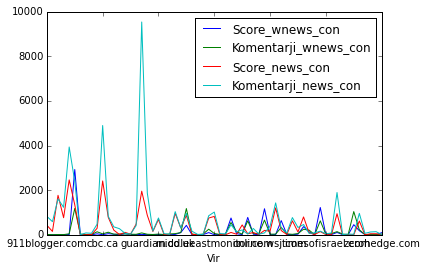

In [167]:
s1.plot()